# Typology Identification

In [1]:
print("Importing libraries.........")

import numpy as np
import matplotlib.pyplot as plt
import csv

import pandas as pd
import geopandas as gpd

from IPython.display import Image
%matplotlib inline

print("Imported Successfully !!")

Importing libraries.........
Imported Successfully !!


In [2]:
# Import the building clusters obtained through Momepy
# bld = gpd.read_file("C:/Msc Research/Thesis Phase/Characterisation Phase/Phase 4 (Google Maps)/main_8clusters.shp")
# bld = gpd.read_file("C:/Msc Research/Thesis Phase/Characterisation Phase/Homogenisation with blocks, landuse, tags and population/cluster8_with_tags__population_and_blocknumb_LU_cluster_level_v2.shp"
bld = gpd.read_file("C:/Msc Research/Thesis Phase/Characterisation Phase 2/Momepy_tag_landuse_blocks/cluster8_tag_lu_block54.shp")

In [3]:
# Display as table
bld

,K_means_La,Tag,Landuse,Block_numb,Area,geometry
0,5,None,Residential Area,0,33.0573,"POLYGON ((1066490.667 823313.547, 1066491.257 ..."
1,5,yes,Residential Area,0,49.7938,"POLYGON ((1066604.094 823314.622, 1066604.241 ..."
2,5,yes,Residential Area,0,70.1620,"POLYGON ((1066575.184 823314.130, 1066575.627 ..."
3,5,yes,Residential Area,0,78.1911,"POLYGON ((1066245.818 823312.555, 1066245.965 ..."
4,5,None,Residential Area,50,83.2230,"POLYGON ((1066445.679 823313.770, 1066447.744 ..."
...,...,...,...,...,...,...
9715,6,yes,Public & Semi-public,16,209.1710,"POLYGON ((1065280.864 821003.978, 1065288.847 ..."
9716,6,yes,Public & Semi-public,16,271.7870,"POLYGON ((1065303.777 820996.252, 1065314.114 ..."
9717,6,college,Public & Semi-public,16,513.2090,"POLYGON ((1065285.898 820965.959, 1065312.987 ..."
9718,6,yes,Public & Semi-public,16,533.8540,"POLYGON ((1065221.876 820985.726, 1065255.638 ..."


## Classification for characterisation
The steps to be followed are: 
1. The first part is to derive the majority clusters within each city blocks.
2. Second, we identify the majority landuse class within each clusters.
3.Then we look at the majority tags within each landuse class

In [4]:
# Define majority functions for clusters within city blocks
def Majority_cluster(df):
    
    '''
    This function finds the majority cluster in a geodataframe
    df: The geodataframe that consists of the cluster numbers.
    '''
    
    # We need to select the building tags here
    cluster = df['K_means_La'].tolist() # Convert from a series to a list
    
    n=len(cluster)
    maxCount = 0
    index = -1 
    for i in range(n):
        count = 0
        for j in range(n):
            if(cluster[i] == cluster[j]):
                count += 1
         # update maxCount if count of current element is greater
        if(count > maxCount):
            maxCount = count
            index = i 
    print(f"{cluster[index]}")

In [5]:
street_blocks = 54

for blocks in range(0,street_blocks):
    df_cluster = bld[bld['Block_numb']==blocks]
    Majority_cluster(df_cluster)
#     print(f"in block number {blocks+1}")

1
1
2
5
1
1
5
2
1
1
1
5
1
1
1
5
1
5
5
1
2
1
1
1
1
1
1
5
1
7
1
1
1
2
5
5
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [6]:
# Define a function to find the majority landuse 
def Majority_landuse(df):
    '''
    This function finds the majority landuse in a geodataframe
    df: The geodataframe that consists of the landuse information.
    '''
    # We need to select the cluster number here
    landuse = df['Landuse']
    landuse = landuse.values.tolist()
               
    n=len(landuse)
    maxCount = 0
    index = -1 
    for i in range(n):
        count = 0
        for j in range(n):
            if(landuse[i] == landuse[j]):
                count += 1
         # update maxCount if count of current element is greater
        if(count > maxCount):
            maxCount = count
            index = i 
    print(landuse[index])

In [14]:
# Find majority landuse at block level
street_blocks=54

for blocks in range(0,street_blocks):
    df_landuse = bld[bld['Block_numb']==blocks]
    Majority_landuse(df_landuse)
#     print(f"in block number {blocks+1}")

Residential Area
Residential Area
Residential Area
Residential Area
Mixed Built-up Area
Mixed Built-up Area
Residential Area
Residential Area
Residential Area
Residential Area
Residential Area
Residential Area
Residential Area
Residential Area
Public & Semi-public
Public & Semi-public
Mixed Built-up Area
Public & Semi-public
Mixed Built-up Area
Mixed Built-up Area
Residential Area
Mixed Built-up Area
Mixed Built-up Area
Mixed Built-up Area
Mixed Built-up Area
Mixed Built-up Area
Mixed Built-up Area
Commercial Area
Mixed Built-up Area
Commercial Area
Mixed Built-up Area
Mixed Built-up Area
Mixed Built-up Area
Mixed Built-up Area
Residential Area
Public & Semi-public
Mixed Built-up Area
Mixed Built-up Area
Residential Area
Mixed Built-up Area
Mixed Built-up Area
Mixed Built-up Area
Residential Area
Residential Area
Residential Area
Mixed Built-up Area
Commercial Area
Mixed Built-up Area
Commercial Area
Mixed Built-up Area
Residential Area
Residential Area
Reclaimed Area
Mixed Built-up Ar

In [15]:
# Find  majority landuse at cluster level
n_clusters=8
for i in range(0,n_clusters):
    df_lu = bld[bld['K_means_La']==i]
    Majority_landuse(df_lu)   
    print(f"in cluster number {i+1}")

Mixed Builtup Area
in cluster number 1
Mixed Builtup Area
in cluster number 2
Residential Area
in cluster number 3
Mixed Builtup Area
in cluster number 4
None
in cluster number 5
Residential Area
in cluster number 6
Residential Area
in cluster number 7
None
in cluster number 8


In [15]:
# Find the majority building tags at a cluster level
def Majority_building_tag(df):
    
    '''
    This function finds the majority building tag in a geodataframe
    df: The geodataframe that consists of the building tags.
    '''
    
    # We need to select the building tags here
    building = df['Tag'].tolist() # Convert from a series to a list
    
    # Remove the unwanted "NONE" and "yes" values
    res = []
    for val in building:
        if (val != None) & (val!='yes'):            
            res.append(val)            
    n=len(res)
    if n==0:
        print("No tags")
    else:
        maxCount = 0
        index = -1 
        for i in range(n):
            count = 0
            for j in range(n):
                if(res[i] == res[j]):
                    count += 1
             # update maxCount if count of current element is greater
            if(count > maxCount):
                maxCount = count
                index = i 
        print(f"{res[index]}")

In [20]:
n_clusters=8
for i in range(0,n_clusters):
    df_btc = bld[bld['K_means_La']==i]
    Majority_building_tag(df_btc)   
    print(f"in cluster number {i+1}")

marketplace industrial
in cluster number 1
marketplace industrial
in cluster number 2
marketplace industrial
in cluster number 3
marketplace industrial
in cluster number 4
college
in cluster number 5
marketplace industrial
in cluster number 6
residential
in cluster number 7
house
in cluster number 8


In [16]:
# Find majority building tags at block level

street_blocks=54

for blocks in range(0,street_blocks):
    df_btb = bld[bld['Block_numb']==blocks]
    Majority_building_tag(df_btb)
#     print(f"in block number {blocks+1}")

house
school
school
house
house
cinema
hospital
public
No tags
school
house
commercial
place_of_worship
school
school
college
school
place_of_worship
commercial
studio
fuel
place_of_worship
grave_yard
hospital
commercial
hospital
school
commercial
bus_station
theatre
hospital
school
police
bus_station
restaurant
park
No tags
No tags
house
No tags
No tags
hospital
hospital
hospital
place_of_worship
college
hospital
No tags
commercial
No tags
house
No tags
cafe
commercial


# Bottom-up Approach



(Frequency of first majority buildings+Frequency of second majority buildings)/(Number of buildings)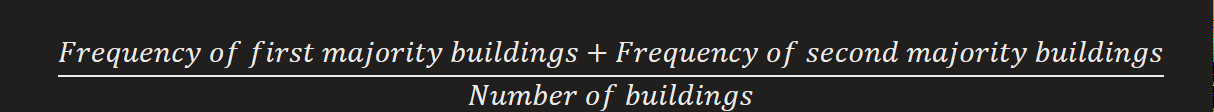



In [17]:
# Define a function that addresses the homogeneousness of a block based on the first and second majority cluster types

def homogeneity_percentage(df):
    
    '''
    This function finds the first and second majority cluster in a geodataframe
    df: The geodataframe that consists of the cluster numbers.
    '''
    
    # We need to select the column here
    cluster = df['K_means_La'].tolist() # Convert from a geopandas series to a list
    
    n=len(cluster)
    maxCount = 0
    index = -1 
    for i in range(n):
        count = 0
        for j in range(n):
            if(cluster[i] == cluster[j]):
                count += 1
         # update maxCount if count of current element is greater
        if(count > maxCount):
            maxCount = count
            index = i 
#     print(f"{cluster[index]} is the first majority cluster")
    
    # Now we remove the first majority cluster to calculate the second majority cluster
    
    # Make a function to get the first majority cluster number indices to remove them from the existing gpd
    def get_ind(lst=None, item=""):
        return [ k for k in range(len(lst)) if lst[k]==item ]
    
    ind = get_ind(cluster, cluster[index]) 
    removed = np.delete(cluster, ind) #Removal of the first majority cluster number here....
    
    # Till this point, we have removed the first majority cluster in order to find the second majority cluster
    # So, now we can run the same function written above on the new gpd, devoid of the first majority cluster
    
    # First convert the array to a pd
    dframe = pd.DataFrame(removed)
    dframe.columns=["K_means_La"] # Add the column name as "K_means_La"
    
    # Now, we need to select the column here
    cluster2 = dframe['K_means_La'].tolist() # Convert from a pandas series to a list
    
    n2=len(cluster2)
    maxCount2 = 0
    index2 = -1 
    for i in range(n2):
        count2 = 0
        for j in range(n2):
            if(cluster2[i] == cluster2[j]):
                count2 += 1
         # update maxCount if count of current element is greater
        if(count2 > maxCount2):
            maxCount2 = count2
            index2 = i 
            
#     print(f"{cluster[index]} is the first majority cluster and {cluster2[index2]} is the second majority cluster")
    
    # Now we add the frequency of the first and second majority buildings and divide by the total number of buildings
    
    # Frequency of first majority cluster OR Number of buildings in the first majority cluster
#     print(f"The number of buildings of the first majority cluster is {maxCount}")
#     print(f"The number of buildings of the second majority cluster is {maxCount2}")
    
    # Now we find the total number of buildings
#     print(f"Total buildings = {n}")
    
    # Finally, we find the percentage of the first majority and second majority clusters w.r.t the total buildings
    final_homogeneity = round((maxCount+maxCount2)/n * 100) #FORMULA
    
#     print(f"The homogeneous percentage of the block is {final_homogeneity}%")
#     print(final_homogeneity)
#     print(f"{cluster2[index2]}")
#     print(f"{cluster[index]} and {cluster2[index2]}")
#     #Print the values on a CSV
#     with open("C:/Msc Research/Thesis Phase/Characterisation Phase/Phase 5 (Homogeneity)/Homogeneity.csv", "wb") as f:
#         writer = csv.writer(f, delimiter=":")
#         writer.writerows(final_homogeneity)

In [18]:
# Select the buildings with the block number and the clusters
block_cluster = bld[["Block_numb", "K_means_La"]]

street_blocks=54

for blocks in range(0,street_blocks):
    
    block = block_cluster["Block_numb"] == blocks
    cluster = block_cluster["K_means_La"] 
    condition = block_cluster[block&cluster]
    
    score = homogeneity_percentage(condition)
#     print("in block number " + str(blocks+1) + "\n" )
    

5
5
5
1
5
5
1
1
5
3
3
1
5
5
5
7
5


IndexError: list index out of range

In [12]:
def count_buildings(df):
    
    '''
    This function finds the majority cluster in a geodataframe
    df: The geodataframe that consists of the cluster numbers.
    '''
    
    # We need to select the building block number here
    cluster = df['Block_numb'].tolist() # Convert from a series to a list
    
    n=len(cluster)
    maxCount = 0
    index = -1 
    for i in range(n):
        count = 0
        for j in range(n):
            if(cluster[i] == cluster[j]):
                count += 1
         # update maxCount if count of current element is greater
        if(count > maxCount):
            maxCount = count
            index = i 
    print(f"{maxCount}")


In [13]:
# Find the number of buildings at the block level
street_blocks=54

for blocks in range(0,street_blocks):
    df_count = bld[bld['Block_numb']==blocks]
    count_buildings(df_count)
#     print(f"in block number {blocks+1}")

482
107
300
127
65
126
179
260
276
481
275
98
159
273
62
87
224
21
77
87
232
260
172
223
490
120
271
48
68
119
319
269
144
40
13
7
256
107
476
92
142
222
177
322
138
300
152
63
38
93
307
122
36
116
